
# <font color = 'pickle'>**Lecture Autograd Pytorch**

Autograd is an automatic differentiation engine in PyTorch that helps us in Neural Network Training. We will learn about neural networks in later sections.

Before using autograd, we have to learn about basic functions, differentiation and gradients.

In [ ]:
!pip install torchviz -qq

In [ ]:
# Importing PyTorch Library
import torch
from torchviz import make_dot

# <font color = 'pickle'>**Functions**

`y = f(x)`

where x can be a scalar or a vector and y is obtained by applying some algebraic calculations on x.

For Example: `y = f(x) = x + 5`

Now if x = [1, 3, 4, 5] we will get y as [6, 8, 9, 10]


Let us create some functions.

In [ ]:
# Creating a tensor x
x = torch.arange(0, 10)

# Creating a tensor y which is a function on x
y = x + 5

# Printing x and y
print(x)
print(y)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])


In [ ]:
# Creating a tensor f which is a function on x
f = 3 * (x**2) + 5

# Printing x and f
print(x)
print(f)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([  5,   8,  17,  32,  53,  80, 113, 152, 197, 248])


# <font color = 'pickle'>**Differentiation and Derivatives**

In deep learning, we train our models successively that means we keep on updating parameters of the model. 

We can compare this with a normal human being learning maths. As he keeps on learning and practicing, his accuracy improves and he is able to solve problems with less errors.

Similarly, when we train deep learning models, we aim to reduce errors or if we say in technical terms, we try to minimize the loss function.

We need differential calculus to perform this task. 

## <font color = 'pickle'>**Why derivatives?**

In deep learning, we aim to reduce the loss function. This means that we are tuning the values of the parameters chosen for the model and concluding how it is affecting the loss function i.e. how los function changes with change in parameter.

Derivative of f(x) i.e f'(x) is the instantaneous rate of change of f(x) with respect to x.

# <font color = 'pickle'>**Automatic Differentiation and Computation Graphs**

We can't really calculate gradients for large complex function in the neural netwok layers.

Thus, we use PyTorch's AutoGrad which will help us to calculate gradients for high dimensional curves with only a few lines of code.

Let us consider an example function and perform differentiation using autograd functions.

In [ ]:
# Initializing tensors
a = torch.tensor([2.0]) 
b = torch.tensor([1.0] )
print(a)
print(b)

tensor([2.])
tensor([1.])


let us define a function :  e = $f(a,b) = (a + b)* (b + 1)$. 

<br> Let us say we want to see how $e$ changes with $a$ i.e we want to calculate   $\dfrac{\partial f}{\partial a}$.
To calculate the gradient, we need to set `a.requires_grad_` to True.
Once we initilialize this parameter to True, AutoGrad starts forming a backward graph for that tensor that tracks every operation applied on it to calculate the gradients using a **Dynamic Computation Graph**. A computation graph is a a way of writing a mathematical expression as a graph. 


In [ ]:
a.requires_grad_(True)
print(a)

tensor([2.], requires_grad=True)


In [ ]:
e = (a + b)* (b + 1)
print(e)

tensor([6.], grad_fn=<MulBackward0>)


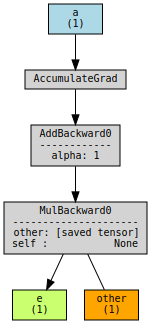

In [ ]:
# Let us visualize the computation graph
make_dot(e, params={'a': a, 'b': b, 'e':e} , show_attrs=True, show_saved=True)

In the above garphs, colored nodes represents tensors. Blue nodes represents tensors for which `requires_grad = True`. Green nodes are output tensors. Orange nodes are saved tensors that are used to calculate gradients. Grey nodes represents functions that are used in computing gradients. Since we have set `requirs_grad = True` only for `tensor a`, the graph keep tracks of functions required to calculate gradient of a only.

<br> Let us say we want to calculate   $\dfrac{\partial f}{\partial b}$ as well.
To calculate this we need to set `b.requires_grad_` to True.

In [ ]:
b.requires_grad_(True)
print(b)

tensor([1.], requires_grad=True)


In [ ]:
e = (a + b) * (b + 1)
print(e)

tensor([6.], grad_fn=<MulBackward0>)


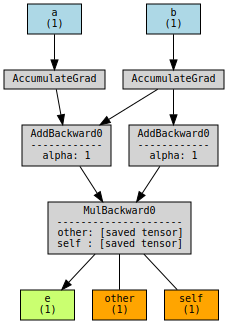

In [ ]:
make_dot(e, params={'a': a, 'b': b, 'e':e}, show_attrs=True, show_saved=True)

We can see that since requires_gard = True for both a as well as b, both are included in the computation graph. The graph keeps track of functions required to calculate gradients of both a and b. Now let us understand the graph in more detail.

## <font color = 'pickle'>**Dynamic Computation Graph**

Tensors whose gradients are set to True along with functions combine to create the dynamic computational graph. 

Each data variable in the graph would have the following members:

- `Data:` It is actual data that the variable contains. 

- `requires_grad:` This member when set to true will start tracking all the operation history and forms a backward graph for gradient calculation. 

- `grad:` It holds the value of gradient. If requires_grad is False it will hold a None value. Even if requires_grad is True, it will hold a None value unless .backward() function is called from some other node.

- `grad_fn:` It is the backward function and is used to calculate the gradient.

- `is_leaf:` A node is leaf if :

  - It was initialized explicitly by some function like x = torch.tensor(1.0) or x = torch.randn(1, 1).
  - It is created after operations on tensors which all have requires_grad = False.
  - It is created by calling .detach() method on some tensor.


In the above example for Tensor a:

- data: torch.tensor(2.0)
- requires_grad: True
- grad: None
- grad_fn: None
- is_Leaf: False

In the above example for Tensor b:

- data: torch.tensor(1.0)
- requires_grad: True
- grad: None
- grad_fn: None
- is_Leaf: True

In the above example for Tensor e:

- data: torch.tensor(6.0)
- requires_grad: True
- grad: None
- grad_fn: MulBackward0
- is_Leaf: False


In [ ]:
print(a.data, a.requires_grad, a.grad, a.grad_fn, a.is_leaf)

tensor([2.]) True None None True


In [ ]:
print(b.data, b.requires_grad, b.grad, b.grad_fn, b.is_leaf)

tensor([1.]) True None None True


In [ ]:
print(e.data, e.requires_grad, e.grad, e.grad_fn, e.is_leaf)

tensor([6.]) True None <MulBackward0 object at 0x7f132c831a90> False


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1083: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:477.)
  return self._grad


## <font color = 'pickle'>**Forward Pass**

Let us understand the graphs now. Pytorch breaks down the computation in to smaller steps using intermediate variables and then use chain rule to calculate gradients.

Forward pass as composite function
$e = (a + b)* (b + 1)$

Forward pass implemented using intermediate variables <br>
$c = a + b = 3 $ <br>
$d = (b+1) = 2 $ <br>
$ e = c * d = 6 $ <br>

In [ ]:
# f(a, b) implemneted as a composite function:
def f_compact(a, b):
  return (a + b) * (b + 1)


In [ ]:
# Check that the composite solution and the step by step solution using intermediate variables are equal
print(f_compact(a, b))

tensor([6.], grad_fn=<MulBackward0>)


Let us visualize the computation graphs once more

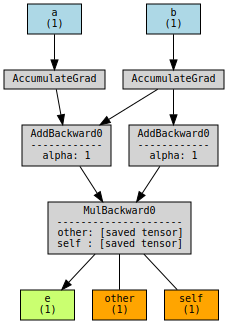

In [ ]:
fab = f_compact(a, b)
make_dot(fab, params={'a': a, 'b': b, 'e':fab}, show_attrs=True, show_saved=True)

Pytorch breaks down the computation in to smaller steps using intermediate variables.

## <font color = 'pickle'>**Callculate Gradients Manually**

We'll now compare the autograd-based solution to the closed form solutions.
$$\nabla_a f(a, b) = b + 1$$
$$\nabla_b f(a, b) = a + 2* b + 1$$

To understand the backward pass and how PyTorch calculates gradients, we will now construct the computation graph manually.

Let us recall the forward pass equations <br>
$c = a + b = 3 $ <br>
$d = (b+1) = 2 $ <br>
$ e = c * d = 6 $ <br>

We can compute the derivatives as follows:

$\dfrac{\partial e}{\partial c} = d $ ; 
$\dfrac{\partial e}{\partial d} = c $ 

$\dfrac{\partial d}{\partial b} =  1$

$\dfrac{\partial c}{\partial a} =  1$ ;
$\dfrac{\partial c}{\partial b} = 1$ 

We want to calculate the derivative of outputs with respect to a and b i.e $\dfrac{\partial e}{\partial a}$ and $\dfrac{\partial e}{\partial b}$. We can calculate these using chan rule as follows:

$\dfrac{\partial e}{\partial a} = \dfrac{\partial e}{\partial c} *\dfrac{\partial c}{\partial a}  = d * 1 = d = b + 1 $

$\dfrac{\partial e}{\partial b} = 
\dfrac{\partial e}{\partial c} *\dfrac{\partial c}{\partial b}   
+ 
\dfrac{\partial e}{\partial d} *\dfrac{\partial d}{\partial b} 
 = d * 1 + c * 1 = d + c = b + 1 + a + b = a + 2b + 1$ 

In [ ]:
# Closed form Solution
def dfda_closed_form(a, b):
  return b + 1
def dfdb_closed_form(a, b):
  return a + 2*b + 1

<font color = indianred>Note: if we don't want gradients, we can switch them off with the torch.no_grad() flag. For closed from solutions we do not want pytorch to compute gadients, hence we will switch these off.

## <font color = 'pickle'>**torch.no_gard() - to swith autograd off**

In [ ]:
with torch.no_grad():
  grad_a_analytical = dfda_closed_form(a, b)
  grad_b_analytical = dfdb_closed_form(a, b)
  
print('gradients using closed form solution\n')
print(f'gradient with respect to a  : {grad_a_analytical}')
print(f'gradient with respect to b  : {grad_b_analytical}')

gradients using closed form solution

gradient with respect to a  : tensor([2.])
gradient with respect to b  : tensor([5.])


## <font color = 'pickle'>**Check Gradients Manually**

In [ ]:
def check_grad():
  a = 2
  b = 1
  e1 = (a + b) * (b + 1)

  h = 0.0001
  a = 2
  a += h
  b = 1
  # b += h
  e2 = (a + b) * (b + 1)

  de = e2-e1
  grad = de/h

  return grad

In [ ]:
check_grad()

2.0000000000042206

## <font color = 'pickle'>**Use backward() method to calculate gardients**

In [ ]:
# DO NOT RUN THIS CELL TWICE
# Using Pytorch Autograd
# For this we will use the method backward() on the output

# forward pass
e =  f_compact(a, b)

# backward pass to calculate gradients
e.backward()

In [ ]:
# after passing the .backward() function on output. We can retrive the gradient with respect to any parameter using
# .grad attribute

print('gradients using pytorch autodiff function \n')
print(f'gradient with respect to a  : {a.grad}')
print(f'gradient with respect to a  : {b.grad}')

gradients using pytorch autodiff function 

gradient with respect to a  : tensor([2.])
gradient with respect to a  : tensor([5.])


## <font color = 'pickle'>**Revisit the graph**

Let us revisit the graph again to understand how PyTorch implements it:

<img src ="https://drive.google.com/uc?export=view&id=1WJpVMgSS1RcQA6oJiaxIL71b05v30Z7C" width =1000 >


In the figure above red color annotation is for forward pass and blue color annotation is for bakward pass.

`downstream gradient = upstream gradient *  local gradient`

Here local gradient is gradient of node with respect to input.

If the backward function is multiplication i.e 
$ f(x, y) = x * y $, then local gradient will be:

$\dfrac{\partial f}{\partial x}$ = y  and $\dfrac{\partial f}{\partial y} = x $.

In this case Pytorch will need to store values of both x and y to calculate local gradients.

If the function is addition i.e. $f(x, y) = x + y$, then local gradient will be:

$\dfrac{\partial f}{\partial x} = \dfrac{\partial f}{\partial y} = 1 $.

In this case Pytorch will need to store constant 1 to calculate local gradient.




In [ ]:
print(a.data, a.requires_grad, a.grad, a.grad_fn, a.is_leaf)

tensor([2.]) True tensor([2.]) None True


In [ ]:
print(b.data, b.requires_grad, b.grad, b.grad_fn, b.is_leaf)

tensor([1.]) True tensor([5.]) None True


In [ ]:
print(e.data, e.requires_grad, e.grad, e.grad_fn, e.is_leaf)

tensor([6.]) True None <MulBackward0 object at 0x7f35be488550> False


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1083: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:477.)
  return self._grad


Now, if we want to calculate gradient with respect to another function, we need to clear the gradient values that are stored initially.

## <font color = 'pickle'>**Calling backward() again**


Earlier we said that we should not run the .backward() function twice. Let use see what happens if we do that. 

In [ ]:
# backward pass to calculate gradients
e.backward()

RuntimeError: ignored

As we can see from thr error message above, call to backward will free up implicit computation graph. If we call it the second time it will give us an error.

## <font color = 'pickle'>**Gradient Accumulation**</font>

Above we called the backward() twice and got an error. Now let us see what happens if we call the forward first (to reconstruct the graph) and then call the backward inside a for loop.

In [ ]:
for i in range(3):
  e =  f_compact(a, b)
  # backward pass to calculate gradients
  e.backward()
  print(f'gradients using pytorch autodiff function for {i+1}th iteration\n')
  print(f'gradient with respect to a  : {a.grad}')
  print(f'gradient with respect to b  : {b.grad}')

gradients using pytorch autodiff function for 1th iteration

gradient with respect to a  : tensor([4.])
gradient with respect to b  : tensor([10.])
gradients using pytorch autodiff function for 2th iteration

gradient with respect to a  : tensor([6.])
gradient with respect to b  : tensor([15.])
gradients using pytorch autodiff function for 3th iteration

gradient with respect to a  : tensor([8.])
gradient with respect to b  : tensor([20.])


Instead of getting the value of gradients as 2 and 5, everytime, we see that gradients keep on increasing everytime. By default PyTorch accumulate gardients i.e it sums the  previous and the current gradients. So if we are calling .backward() method in a loop, we should always clear the gradients first unless we want to accumulate gradients.

In [ ]:
for i in range(3):

  fab_intermediate =  f_compact(a, b)
  # backward pass to calculate gradients
  a.grad.zero_()
  b.grad.zero_()
  fab_intermediate.backward()

  # update weights 
  print(f'\ngradients using pytorch autodiff function for {i+1}th iteration')
  print(f'gradient with respect to a  : {a.grad}')
  print(f'gradient with respect to a  : {b.grad}')



gradients using pytorch autodiff function for 1th iteration
gradient with respect to a  : tensor([2.])
gradient with respect to a  : tensor([5.])

gradients using pytorch autodiff function for 2th iteration
gradient with respect to a  : tensor([2.])
gradient with respect to a  : tensor([5.])

gradients using pytorch autodiff function for 3th iteration
gradient with respect to a  : tensor([2.])
gradient with respect to a  : tensor([5.])


## <font color = 'pickle'>**More Examples**


In [ ]:
# Initializing tensors
x = torch.tensor([2.0, 4.0])
x.requires_grad_(True)

tensor([2., 4.], requires_grad=True)

In [ ]:
# Initial gradient of x will be None
print(x.grad)

None


In [ ]:
y = 3 * (torch.dot(x, x))
print(y)

tensor(60., grad_fn=<MulBackward0>)


In [ ]:
print(x.data, x.requires_grad, x.grad, x.grad_fn, x.is_leaf)

tensor([2., 4.]) True None None True


In [ ]:
print(y.data, y.requires_grad, y.grad, y.grad_fn, y.is_leaf)

tensor(60.) True None <MulBackward0 object at 0x7f12b9349810> False


In [ ]:
# Calculating and displaying gradient y with respect to x
y.backward()
x.grad

tensor([12., 24.])

In [ ]:
# Create new y function
z = 2 * (torch.dot(x, x))

# Calculating and displaying gradient without clearing the previous gradients
z.backward()
x.grad

tensor([20., 40.])

In [ ]:
# Again Pytorch has accumulated the gradients, we need to clear the gradients before we can calculate gradients for new functions

x.grad.zero_()

# Since we have called backwards once we need to recreate the graph by calling forward again
z = 2 * (torch.dot(x, x))
z.backward(retain_graph=True)
x.grad

tensor([ 8., 16.])

## <font color = 'pickle'>**Detaching Computations**






We will also need to detach the tensor, if we want to convert the tensor to numpy array. 

In [ ]:
x.numpy()

RuntimeError: ignored

In [ ]:
x.detach().numpy()

array([2., 4.], dtype=float32)

# <font color = 'pickle'>**Autograd from scratch**

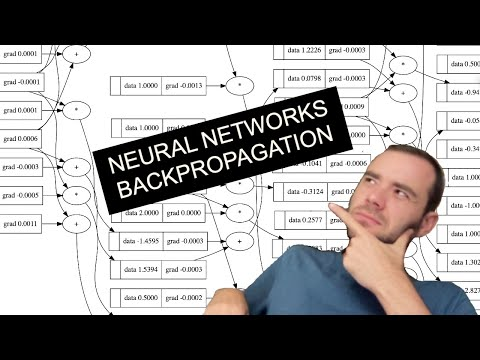

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('VMj-3S1tku0')